In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
print('Dimensions of training data :' , train_images.shape)
print('Dimensions of test data :', test_images.shape)

Dimensions of training data : (60000, 28, 28)
Dimensions of test data : (10000, 28, 28)


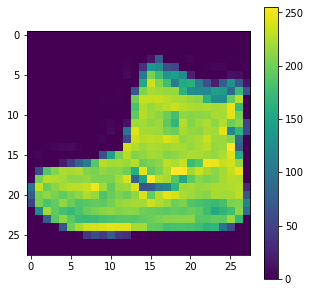

In [13]:
# Preprocess the data
plt.figure(figsize=(5,5))
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
# Scaling images before feeding to neural network
train_images = train_images / 255
test_images = test_images / 255

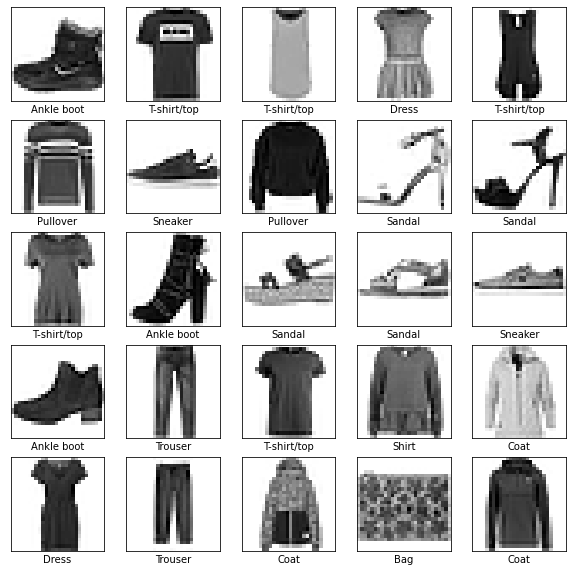

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [20]:
for i in range(25):
    print(class_names[train_labels[i]])

Ankle boot
T-shirt/top
T-shirt/top
Dress
T-shirt/top
Pullover
Sneaker
Pullover
Sandal
Sandal
T-shirt/top
Ankle boot
Sandal
Sandal
Sneaker
Ankle boot
Trouser
T-shirt/top
Shirt
Coat
Dress
Trouser
Coat
Bag
Coat


In [23]:
# Build neural network model (configuring layers of the model and then compile the model) (tf.keras.layers.Dense)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # Converts two dimensional array to one dimensional array (28 * 28 = 784 pixels)
    tf.keras.layers.Dense(128, activation='relu'), # 128 neurons
    tf.keras.layers.Dense(10) # returns logit array with length of 10
])

# loss function measures accuracy of model during the training - need to minimize the function
# Optimizer - This is how data is updated based on data as it sees, and it's loss function
# Metrics - Used to monitor testing and training steps

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model
1. Feed training data to the model
2. The model will learn to associate train_data, train_labels
3. Ask model to predict test_images and test_labels
4. Verify if the predictions match test_labels

In [24]:
model.fit(train_images, train_labels, epochs= 10)

2021-12-24 08:37:59.045962: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-12-24 08:37:59.177596: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4968 - accuracy: 0.8260
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3769 - accuracy: 0.8636
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3368 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3155 - accuracy: 0.8841
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2948 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2810 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2684 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2582 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2480 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.240

# Evaluate accuracy

In [25]:
test_loss , test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest Accuracy:', test_acc)

2021-12-24 08:44:33.775128: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 0.3422 - accuracy: 0.8825 - 1s/epoch - 3ms/step

Test Accuracy: 0.8825000524520874


## Notes:
- From above, it seems training data has 91 % accuracy whereas test data has only 88 % accuracy. It is a sign of "Over fitting".
- Overfitting happens when training data memorizes noise & details in the dataset where it negatively impacts on the new data

## Make Predictions

In [27]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

# A prediction is an array of 10 numbers.
# They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing.

2021-12-24 08:56:29.815299: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([2.8533486e-07, 7.2183849e-11, 2.2085418e-09, 2.9808476e-09,
       3.1834610e-08, 7.7664172e-03, 3.0009264e-06, 6.3573793e-03,
       1.9726276e-08, 9.8587286e-01], dtype=float32)

In [30]:
print('Label with highest confidence value: ', np.argmax(predictions[0])) # model is very confident about the label 9
print('Examining the test label that shows the classification is correct :', test_labels[0])

Label with highest confidence value:  9
Examining the test label that shows the classification is correct : 9


In [31]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

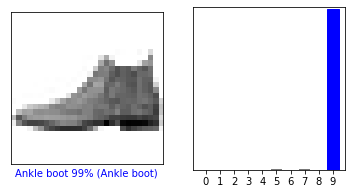

In [32]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

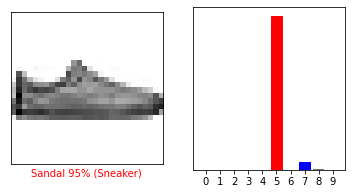

In [33]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

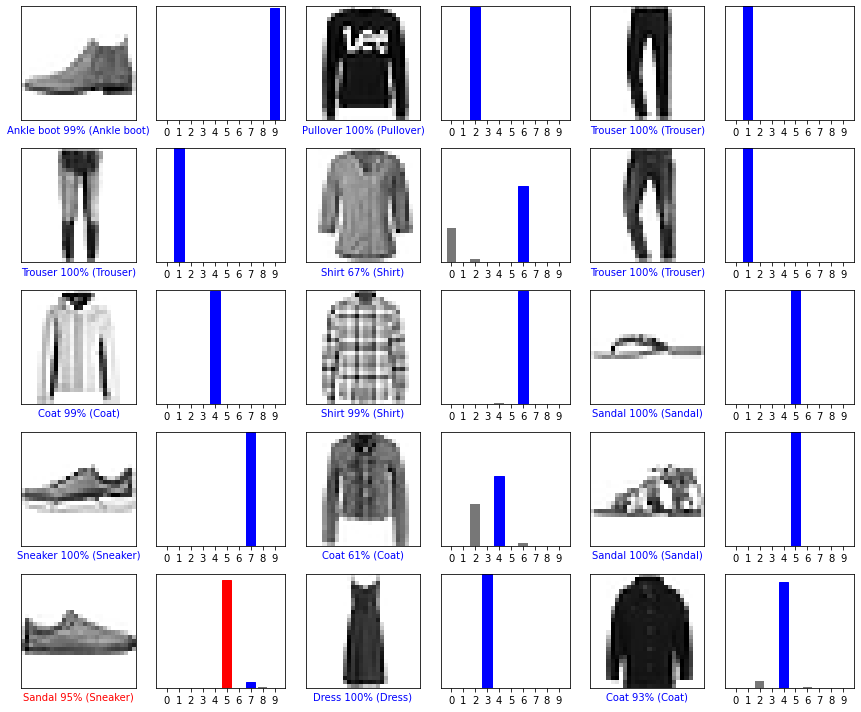

In [34]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

In [35]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [36]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [37]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[4.2696390e-04 6.1093535e-15 9.9871683e-01 1.7412688e-14 2.2516568e-04
  1.2043860e-18 6.3106848e-04 8.3159042e-24 4.6444255e-11 9.2244810e-15]]


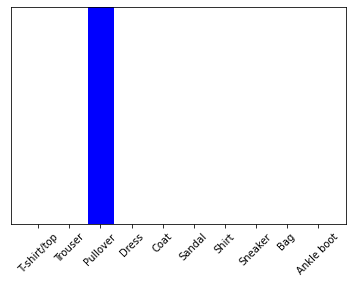

In [38]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [39]:
np.argmax(predictions_single[0])

2